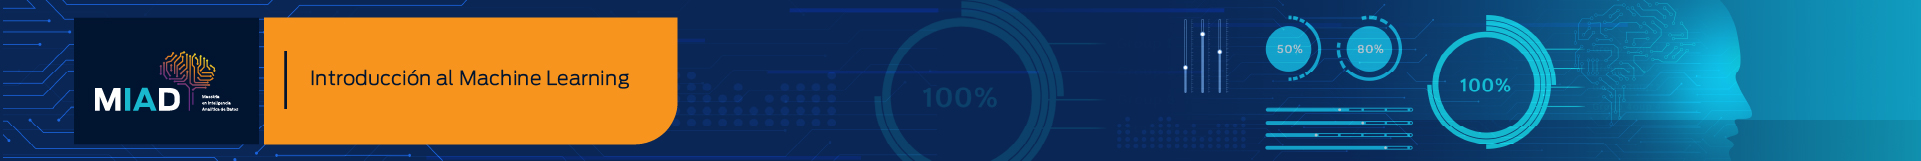

# Introducción al Machine Learning - Semana 5
## Caso: Aplicación de árboles de decisión y ensamblajes

### Propósito de la actividad

En esta actividad podrán poner en práctica, con un conjunto de datos reales, su habilidad para implementar modelos basados en árboles y ensamblajes para seleccionar aquel que tenga el mejor desempeño para resolver un problema de clasificación. En particular, se deberán implementar modelos de árboles sencillos, random forest y gradient boosting.

Además, como en todo procedimiento de analítica de datos, se evaluará la exploración preliminar de los datos por medio de herramientas como histogramas, correlogramas y estadísticas descriptivas.

### Instrucciones generales

1. Para desarrollar el notebook, lo deberán descargar a un repositorio (pueden escoger el repositorio de su preferencia) para que lo puedan trabajar grupalmente.

2. Los procedimientos en el notebook deberán responderse en los espacios especificados para tal fin, debajo de cada uno de los puntos.

3. Para que la actividad sea calificada, deberán subir únicamente este mismo archivo con la extensión ".ipynb" a la actividad de "entrega calificada por el personal" correspondiente a este caso.

4. El archivo que suban debe poder ejecutarse localmente cuando sea descargado por el tutor, asumiendo que la base de datos de la actividad ya ha sido importada en el correspondiente archivo separado por comas (.csv).

### Criterios de evaluación

Los criterios que se evaluarán son: 

Análisis preliminar de variables: Se presentan correlogramas, histogramas y estadísticas descriptivas de las variables de la base de datos y se hace un análisis coherente de cada uno de ellos. [10 puntos] 

Estimación modelo de árbol de decisión: Se estima el modelo usando un árbol de decisión, se evalúa su desempeño en la muestra de test y se analizan correctamente los resultados y el procedimiento realizado. [20 puntos] 

Estimación modelo de bagging: Se estima el modelo usando bagging, se evalúa su desempeño en la muestra de test y se analizan correctamente los resultados y el procedimiento realizado. [20 puntos]

Estimación modelo de random forest: Se estima el modelo usando random forest, se evalúa su desempeño en la muestra de test y se analizan correctamente los resultados y el procedimiento realizado. [20 puntos] 

Estimación modelo de gradient boosting: Se estima el modelo usando gradient boosting, se evalúa su desempeño en la muestra de test y se analizan correctamente los resultados y el procedimiento realizado. [20 puntos] 

Elección del mejor modelo: Se elige el mejor modelo de acuerdo a los resultados obtenidos y se justifica adecuadamente la elección. [10 puntos] 


### Datos

En esta ocasión usarán una base de datos disponible en la página R-Data. Esta base de datos corresponde a "Weekly", la cual contiene 8 variables predictivas sobre el índice bursátil S&P500 y 1089 observaciones. De esta manera, el objetivo de la actividad es predecir si el precio del índice subirá o bajará la semana siguiente.

Por lo anterior, en primer lugar deberán descargar la base de datos del siguiente enlace: https://r-data.pmagunia.com/dataset/r-dataset-package-islr-weekly

###  Análisis preliminar de variables (10 puntos)
Realicen un análisis preliminar de los predictores y de la variable de respuesta (correlogramas, histogramas y estadísticas descriptivas).

In [1]:
#### Utilicen este espacio para escribir los códigos del procedimiento del punto 1 ####
import numpy as np
import seaborn as sns
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn import metrics
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import matplotlib.pyplot as plt

weekly = pd.read_csv("Weekly.csv",index_col=0)
weekly.head(10)

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
1,1990,0.816,1.572,-3.936,-0.229,-3.484,0.154976,-0.270,Down
2,1990,-0.270,0.816,1.572,-3.936,-0.229,0.148574,-2.576,Down
3,1990,-2.576,-0.270,0.816,1.572,-3.936,0.159837,3.514,Up
4,1990,3.514,-2.576,-0.270,0.816,1.572,0.161630,0.712,Up
5,1990,0.712,3.514,-2.576,-0.270,0.816,0.153728,1.178,Up
6,1990,1.178,0.712,3.514,-2.576,-0.270,0.154444,-1.372,Down
7,1990,-1.372,1.178,0.712,3.514,-2.576,0.151722,0.807,Up
8,1990,0.807,-1.372,1.178,0.712,3.514,0.132310,0.041,Up
9,1990,0.041,0.807,-1.372,1.178,0.712,0.143972,1.253,Up
10,1990,1.253,0.041,0.807,-1.372,1.178,0.133635,-2.678,Down


In [2]:
print(weekly.info())

<class 'pandas.core.frame.DataFrame'>
Index: 1089 entries, 1 to 1089
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Year       1089 non-null   int64  
 1   Lag1       1089 non-null   float64
 2   Lag2       1089 non-null   float64
 3   Lag3       1089 non-null   float64
 4   Lag4       1089 non-null   float64
 5   Lag5       1089 non-null   float64
 6   Volume     1089 non-null   float64
 7   Today      1089 non-null   float64
 8   Direction  1089 non-null   object 
dtypes: float64(7), int64(1), object(1)
memory usage: 85.1+ KB
None


/var/folders/94/1qftc2251rq1frpthqkbds7h0000gn/T/ipykernel_18871/3366342934.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=weekly, x="Direction", palette="Blues")


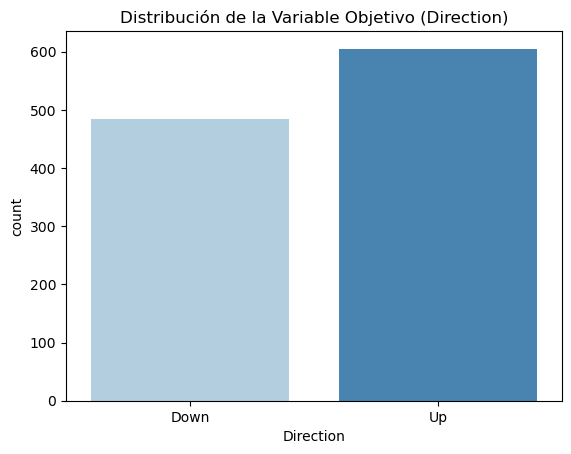

Direction
Up      0.555556
Down    0.444444
Name: proportion, dtype: float64


In [3]:
# Distribución de la variable target
sns.countplot(data=weekly, x="Direction", palette="Blues")
plt.title("Distribución de la Variable Objetivo (Direction)")
plt.show()

# Ver frecuencia de cada categoría
print(weekly["Direction"].value_counts(normalize=True))

Se observa que el S&P 500 para las semanas del análisis muestra un posible comportamiento alcista (no teniendo en cuenta el tamaño del movimiento), esto se deduce de la mayor cantidad de semanas que el mercado sube en comparación a las que cae

In [4]:
weekly["Direction"] = weekly["Direction"].map({"Up": 1, "Down": 0})

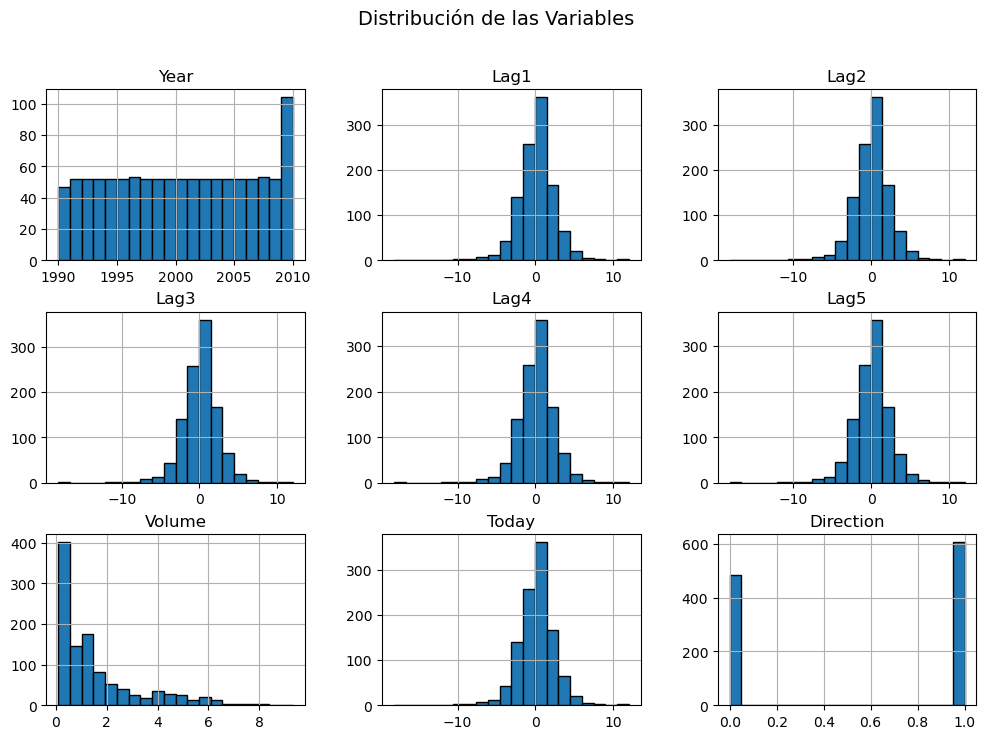

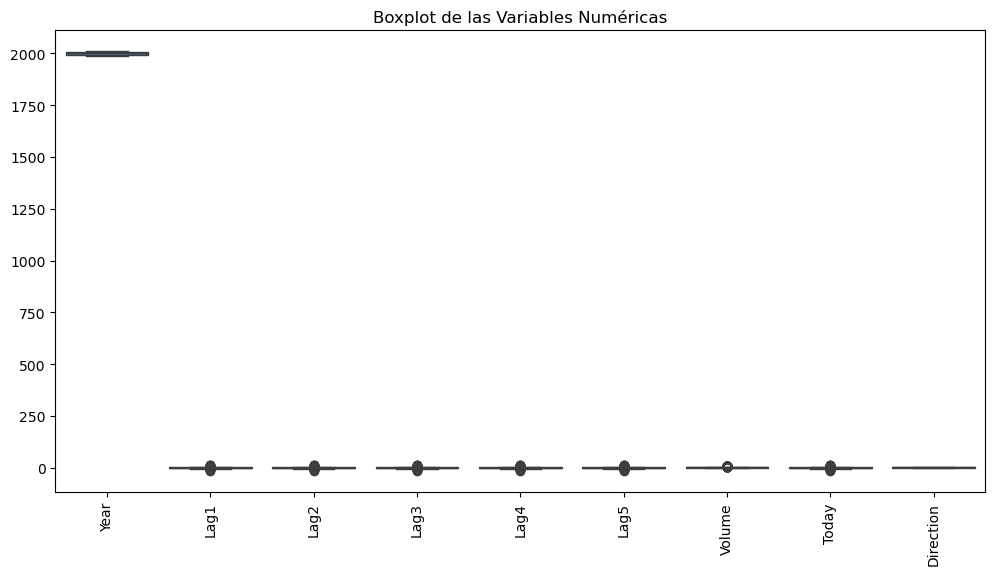

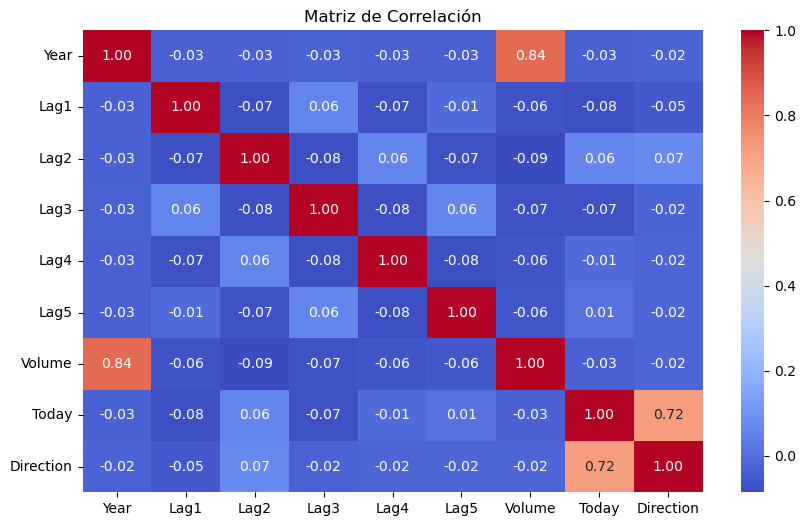

In [5]:
# Histograma de las variables numéricas
weekly.hist(figsize=(12, 8), bins=20, edgecolor='black')
plt.suptitle("Distribución de las Variables", fontsize=14)
plt.show()

# Boxplot para detectar valores atípicos
plt.figure(figsize=(12, 6))
sns.boxplot(data=weekly)
plt.xticks(rotation=90)
plt.title("Boxplot de las Variables Numéricas")
plt.show()

# Matriz de correlación
plt.figure(figsize=(10, 6))
sns.heatmap(weekly.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de Correlación")
plt.show()



**Distribución de las Variables:**

Las variables Lag1, Lag2, Lag3, Lag4, Lag5 y Today parecen seguir una distribución normal centrada en cero, con una ligera variabilidad.
La variable Volume tiene una distribución asimétrica con una mayor concentración de valores bajos y una larga cola derecha.
La variable Year muestra una distribución más uniforme, pero con un aumento en la cantidad de datos hacia los años más recientes.

**Matriz de Correlación:**

La variable Volume tiene una fuerte correlación positiva (0.84) con Year, lo que sugiere que el volumen de transacciones ha aumentado con el tiempo.
No se observan correlaciones significativas entre las variables de rezago (Lag1 - Lag5) y la variable objetivo (Today), lo que indica que la relación entre los valores pasados y los actuales podría ser débil o inexistente.
Boxplot de las Variables Numéricas:

La variable Year tiene una escala mucho mayor en comparación con las demás, lo que sugiere que sería recomendable estandarizar las variables antes de realizar algún análisis adicional.
Para las demás variables, se observa una dispersión relativamente pequeña, excepto en el caso de Volume, que podría tener valores atípicos.

/var/folders/94/1qftc2251rq1frpthqkbds7h0000gn/T/ipykernel_18871/1759898606.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=weekly, x="Direction", y=lag, palette="coolwarm", ax=axes[i])
/var/folders/94/1qftc2251rq1frpthqkbds7h0000gn/T/ipykernel_18871/1759898606.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=weekly, x="Direction", y=lag, palette="coolwarm", ax=axes[i])
/var/folders/94/1qftc2251rq1frpthqkbds7h0000gn/T/ipykernel_18871/1759898606.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=weekly, x="Direction", y

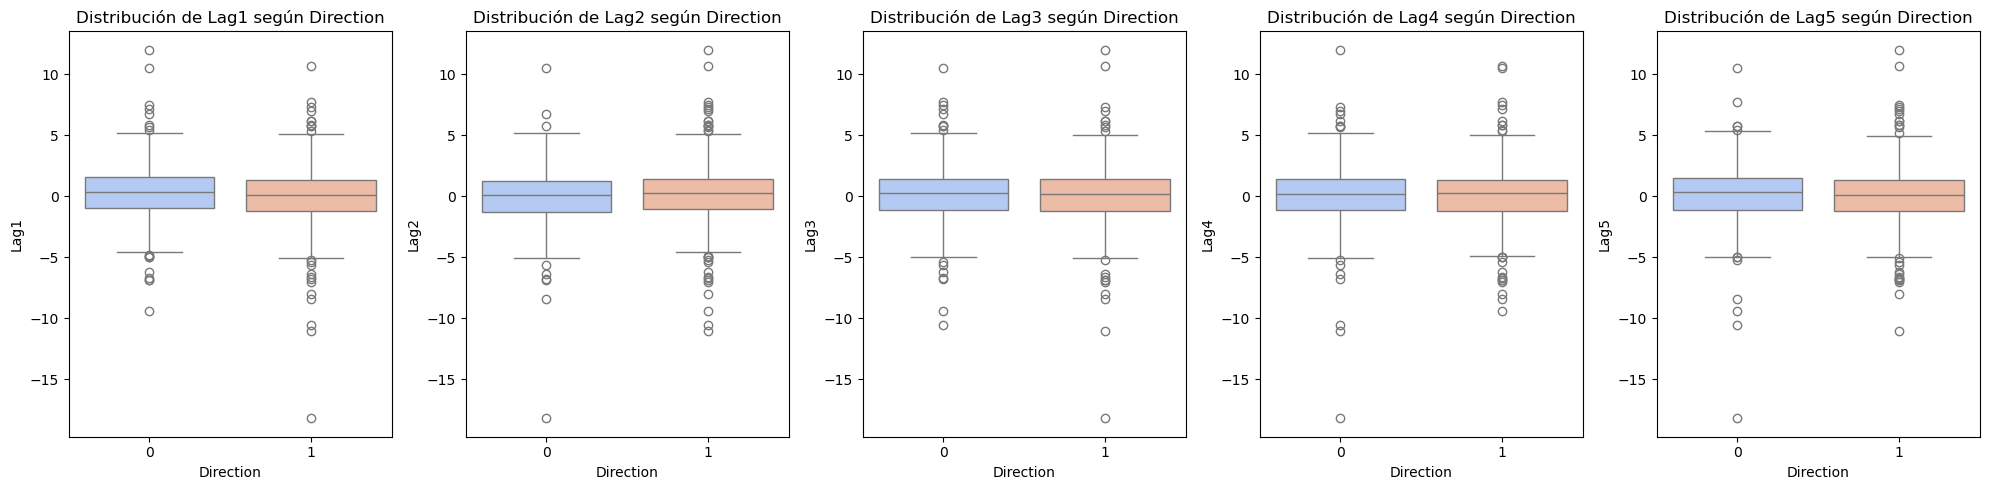

In [6]:
fig, axes = plt.subplots(1, 5, figsize=(20, 5))

# Iterar sobre los 5 Lags
for i, lag in enumerate(["Lag1", "Lag2", "Lag3", "Lag4", "Lag5"]):
    sns.boxplot(data=weekly, x="Direction", y=lag, palette="coolwarm", ax=axes[i])
    axes[i].set_title(f"Distribución de {lag} según Direction")

plt.tight_layout()
plt.show()

Para este caso se observa que no se puede distinguir que los lags tengan un efecto de la dirección alcista o bajista del mercado. No se puede distinguir que una rentabilidad positiva en alguno de los lags pueda ser una referencia para predecir si la siguiente semana el mercado va a subir o bajar

In [7]:
### Arreglo de la base para los ejercicios
yTotal = weekly['Direction']
XTotal = weekly.drop(columns=['Direction','Today'])
### Se parte la base en TEST y TRAIN
XTrain, XTest, yTrain, yTest = train_test_split(XTotal, yTotal, test_size=0.33, random_state=0)


### 2. Estimación modelo de árbol de decisión (20 puntos)
Estimen un árbol de decisión con la muestra de entrenamiento y calculen su poder predictivo evaluándolo en la muestra de test.

In [8]:
#### Utilicen este espacio para escribir los códigos del procedimiento del punto 2 ####
clfTree = DecisionTreeClassifier()
clfTree.fit(XTrain, yTrain)

DecisionTreeClassifier()

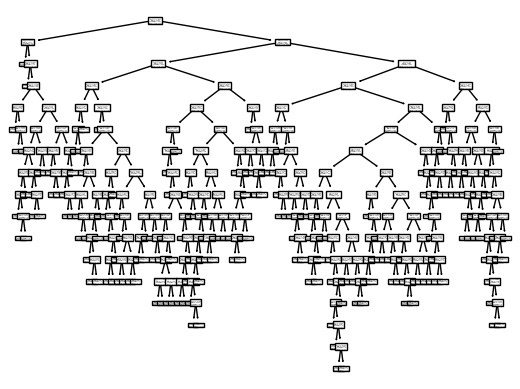

In [9]:
plot_tree(clfTree)
plt.show()

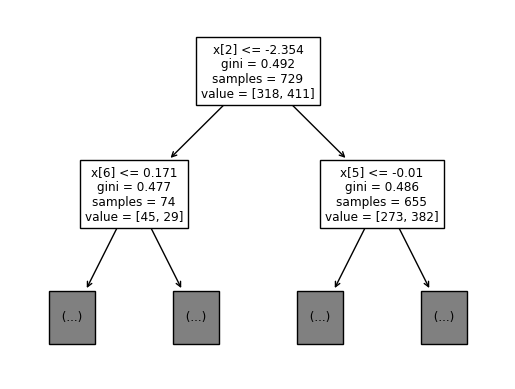

In [10]:
plot_tree(clfTree,max_depth=1)
plt.show()

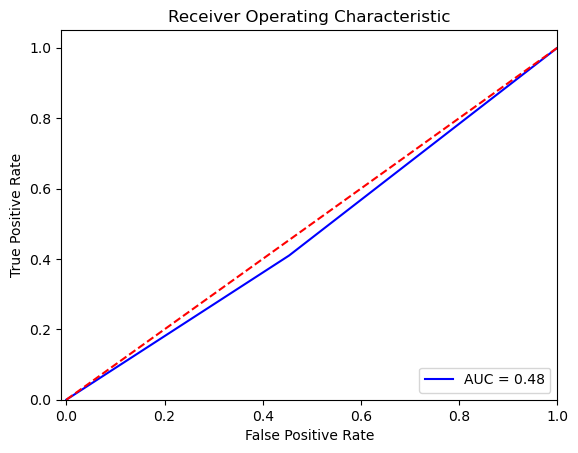

In [11]:
prediccionTree=clfTree.predict_proba(XTest)[:,0]
fpr, tpr, thresholds = metrics.roc_curve(yTest, prediccionTree, pos_label=0)
AUCTree=metrics.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % AUCTree)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1])
plt.ylim([0, 1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Este modelo tiene un AUC menor a un clasificador aleatorio (lanzar una moneda al aire) por lo que no es un buen modelo para predecir el comportamiento del mercado

### 3. Estimación modelo de bagging (20 puntos)
Estimen un modelo de bagging para árboles de decisión y calculen su poder predictivo evaluándolo en la muestra de test.

In [12]:
#### Utilicen este espacio para escribir los códigos del procedimiento del punto 3 ####
clfBag = BaggingClassifier(n_estimators=80, random_state=0)
clfBag.fit(XTrain, yTrain)

BaggingClassifier(n_estimators=80, random_state=0)

Se elige 80 ya que es el numero con el que mejor valor AUC se obtiene, se deja la variable de random_state en 0 para comparar modelos de forma justa

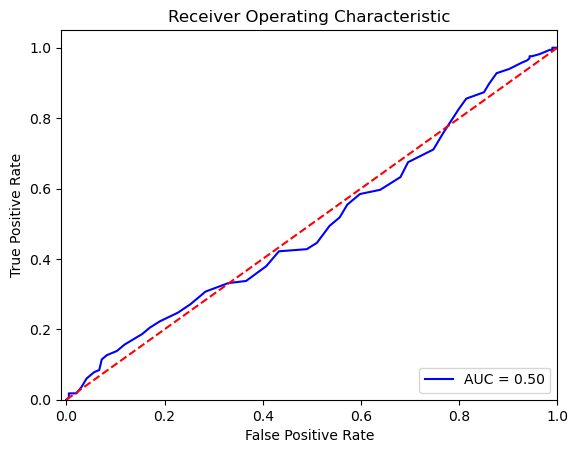

In [13]:
prediccionBag=clfBag.predict_proba(XTest)[:,0]
fpr, tpr, thresholds = metrics.roc_curve(yTest, prediccionBag, pos_label=0)
AUCBag=metrics.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % AUCBag)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1])
plt.ylim([0, 1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

La curva ROC mostrada tiene un AUC = 0.50, lo cual indica que el modelo no está diferenciando mejor que una predicción completamente aleatoria. En otras palabras, el modelo no aporta información útil para clasificar los casos en positivos o negativos.

### 4. Estimación modelo de random forest (20 puntos)
Estimen un modelo de Random Forest y evalúen su poder predictivo en la muestra de test.

In [14]:
#### Utilicen este espacio para escribir los códigos del procedimiento del punto 4 ####
clfRF = RandomForestClassifier(random_state=0)
clfRF.fit(XTrain, yTrain)

RandomForestClassifier(random_state=0)

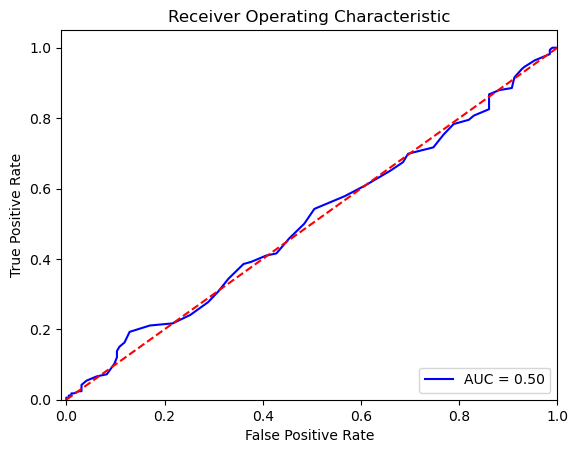

In [15]:
prediccionRF=clfRF.predict_proba(XTest)[:,0]
fpr, tpr, thresholds = metrics.roc_curve(yTest, prediccionRF, pos_label=0)
AUCRF=metrics.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % AUCRF)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1])
plt.ylim([0, 1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Las variables Lag no contienen información suficiente para predecir la variable dirección que además se podria considerar aleatoria. En caso de **Random Forest** el modelo da un valor de AUC = 0.50, siendo esto un estimador que no se aleja de un clasificador aleatorio.  

### 5. Estimación modelo de gradient boosting (20 puntos)
Estimen un modelo de Gradient Boosting y evalúen su poder predictivo en la muestra de test.

In [16]:
#### Utilicen este espacio para escribir los códigos del procedimiento del punto 5 ####
clfGB= GradientBoostingClassifier(learning_rate=0.67,max_depth=3,random_state=0)
clfGB.fit(XTrain, yTrain)




GradientBoostingClassifier(learning_rate=0.67, random_state=0)

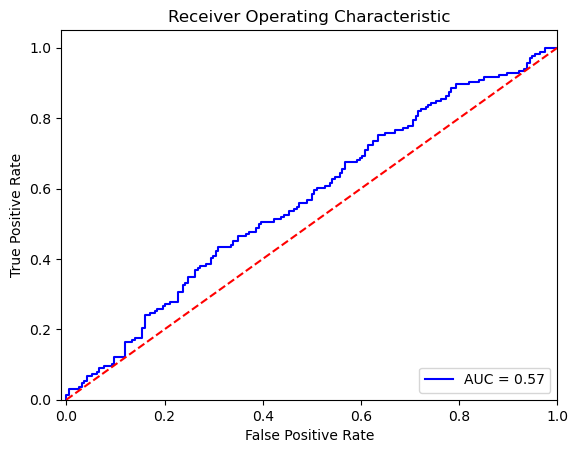

In [17]:

prediccionGB=clfGB.predict_proba(XTest)[:,0]
fpr, tpr, thresholds = metrics.roc_curve(yTest, prediccionGB, pos_label=0)
AUCGB=metrics.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % AUCGB)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1])
plt.ylim([0, 1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()




El modelo Gradient Boosting, a pesar de ser el que mejor desempeño tiene entre todos, con un AUC de 0.57, tiene un desempeño muy pobre ya que solo está distinguiendo un 7% mejor que un clasificador aleatorio

### 6. Selección del mejor modelo (10 puntos)
¿Cuál modelo de los estimados en este caso resulta mejor para la predicción de la variable de respuesta? Justifiquen su respuesta.

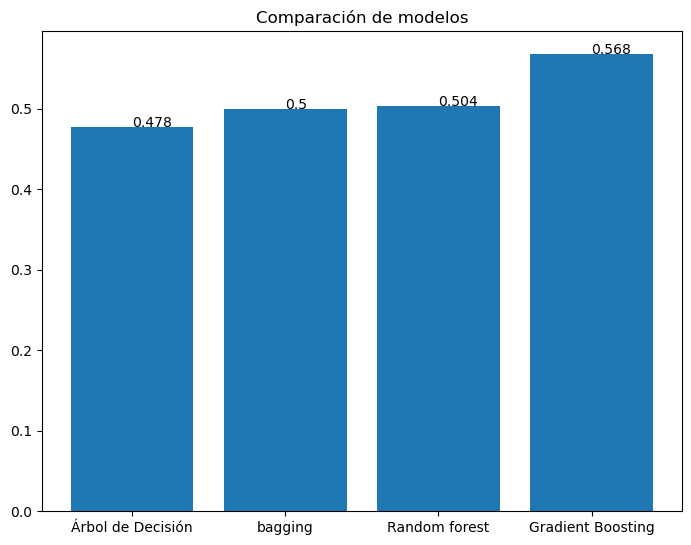

In [18]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title("Comparación de modelos")
ejeX = ['Árbol de Decisión','bagging','Random forest','Gradient Boosting']
ejeY = [round(AUCTree,3),round(AUCBag,3),round(AUCRF,3),round(AUCGB,3)]
ax.bar(ejeX,ejeY)
def addlabels(x,y,plotP):
    for i in range(len(x)):
        plotP.text(i,y[i],y[i])
addlabels(ejeX,ejeY,plt)
plt.show()

Dadas las estimaciones de los modelos, ninguno se separa considerablemente de un clasificador aleatorio, por lo que estos modelos no son adecuados para predecir los movimientos del mercado. En caso de tener que seleccionar uno de los modelos, se tomaria el **Gradient Boosting** con un AUC de 0.568